CNN classifier for the MNIST dataset

In [ ]:
!pip install keras --upgrade

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
#PACKAGE IMPORTS
# Import all required packages.
# tensorflow , panda, numpy, matplotlib.pyplot
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# If you would like to make further imports from Tensorflow, add them here
#form keras import Sequential, Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
import random

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

Load and preprocess the data


In [ ]:
# load the data set from Keras according the dataset description
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

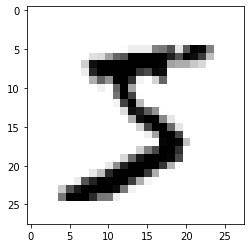

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
""" This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# Run your function on the input data
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a MxM kernel and n filters.
 Use 'SAME' zero padding and ReLU activation functions. 
 Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a lxl window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have more than 3 layers.

In [ ]:
""" CREATE a model function
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """

In [ ]:
def modeloG(input):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(input, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(input, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
  return model

In [ ]:
model = modeloG(64)

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:
 """ Create a compile function 
 This function takes in the model returned from your model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """

In [ ]:
# Run your compile function
def compilacion(model):
  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
compilacion(model)

###Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's fit method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [ ]:
""" CREATE YOUR FIT MODEL FUNCTON
    This function should train the model at least for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """

In [ ]:
# Run your model fit function
def Fitting(model):
  return model.fit(x_train, y_train, epochs=5)
  

In [ ]:
hist = Fitting(model)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2314 - accuracy: 0.9291
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0827 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0607 - accuracy: 0.9815
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0485 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0419 - accuracy: 0.9884


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [ ]:
# Run to load the model history into a pandas DataFrame
df = pd.DataFrame(hist.history)
df.head()

,loss,accuracy
0,0.231390,0.929133
1,0.082726,0.975083
2,0.060730,0.981467
3,0.048534,0.985383
4,0.041881,0.988383


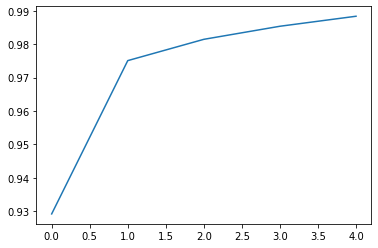

In [ ]:
# Run to make the Accuracy vs Epochs plot
plt.plot(hist.epoch, df.accuracy)
plt.show()

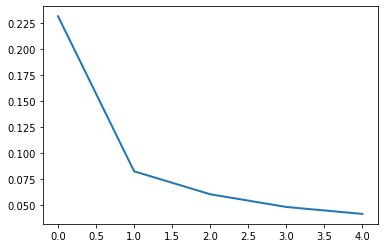

In [ ]:
# Run to make the Loss vs Epochs plot
plt.plot(hist.epoch, df.loss, linewidth=2.0)
plt.show()

###Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's evaluate method.

In [ ]:
# CREATE A EVALUATION FUNCTION
  """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """

In [ ]:
# Run and print your function to evaluate the model
def evaluacion(model):
  val_loss, val_acc = model.evaluate(x_test, y_test)
  print(val_loss)
  print(val_acc)

In [ ]:
evaluacion(model)

313/313 [==============================] - 2s 7ms/step - loss: 0.0661 - accuracy: 0.9815
0.06611678004264832
0.9815000295639038


### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

In [ ]:
# get model predictions on randomly selected test images
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))

313/313 [==============================] - 2s 7ms/step
7


Plot your predictions 

In [ ]:
id = range(x_test.shape[0])
randomId = random.sample(id, 4)
random_test_images = x_test[randomId]
random_test_labels = y_test[randomId]

predictions = model.predict(random_test_images)
print(np.argmax(predictions[0]))

1/1 [==============================] - 0s 20ms/step
2


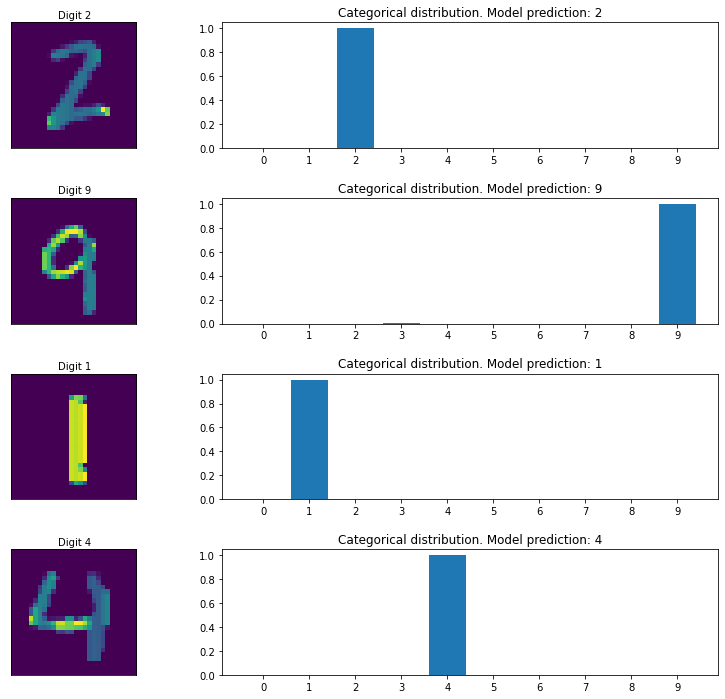

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)): 
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()